In [128]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, fixed
from IPython import display
from random import randint
from time import sleep
from sympy import symbols, Eq
from sympy.solvers import solve
from sympy.parsing.sympy_parser import parse_expr

# Projectile game

## Easy Mode

In [116]:
xlo = -2
xhi = 20
ylo = -20
yhi = 120

def graph(a, b, c, height, distance):
    plt.clf()
    fix = plt.subplot()
    plt.axis([xlo, xhi, ylo, yhi])
    plt.plot([0, 0], [ylo, yhi], "black")
    plt.plot([xlo, xhi], [0, 0], "black")
    wall_height = height
    wall_distance = distance
    plt.plot([wall_distance, wall_distance], [0, wall_height], "brown")
    plt.grid()
    plt.title(f"{a:.1f}*x**2 + {b:.1f}*x + {c:.1f}")
    
    x = np.linspace(0, xhi, xhi*1000)
    y = a*x**2 + b*x + c
    success = a*wall_distance**2 + b*wall_distance + c > wall_height
    x2 = []
    y2 = []
    for i in range(len(y)):
        if y[i] < 0:
            break
        if not success and x[i] > wall_distance:
            break
        x2.append(x[i])
        y2.append(y[i])
        
    y2[-1] = 0 # finally ball hits the ground (handling imprecisions and ball hitting walls)
    plt.plot([x2[-1]], [y2[-1]], 'ro')
    plt.plot(x2, y2, "b")
    plt.show()


slider_range = (-25, 25, 0.1)
wall_height = randint(2, yhi-20)
wall_distance = randint(2, xhi-2)
interactive_graph = interactive(graph, a=slider_range, b=slider_range, c=slider_range, height=fixed(wall_height), distance=fixed(wall_distance))
interactive_graph

interactive(children=(FloatSlider(value=0.0, description='a', max=25.0, min=-25.0), FloatSlider(value=0.0, des…

## Hard Mode
Now guess projectile paramaters without fiddloing with slider

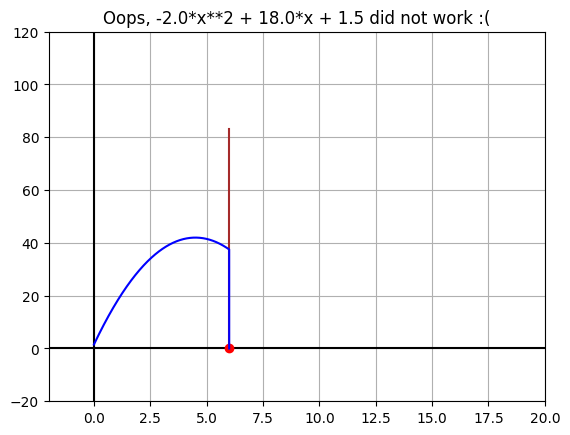

In [127]:
xlo = -2
xhi = 20
ylo = -20
yhi = 120

wall_height = randint(2, yhi-20)
wall_distance = randint(2, xhi-2)

plt.clf()
fix = plt.subplot()
plt.axis([xlo, xhi, ylo, yhi])
plt.plot([0, 0], [ylo, yhi], "black")
plt.plot([xlo, xhi], [0, 0], "black")
plt.plot([wall_distance, wall_distance], [0, wall_height], "brown")
plt.grid()
display.display(plt.gcf())

print("You're at origin, provide A, B and C values for projectile to get across wall.")
a = float(input("A: "))
b = float(input("B: "))
c = float(input("C: "))

x = np.linspace(0, xhi, xhi*1000)
y = a*x**2 + b*x + c
success = a*wall_distance**2 + b*wall_distance + c > wall_height
x2 = []
y2 = []
for i in range(len(y)):
    if y[i] < 0:
        break
    if not success and x[i] > wall_distance:
        break
    x2.append(x[i])
    y2.append(y[i])

if success:
    plt.title(f"Awesome, {a:.1f}*x**2 + {b:.1f}*x + {c:.1f} worked!")
else:
    plt.title(f"Oops, {a:.1f}*x**2 + {b:.1f}*x + {c:.1f} did not work :(")
    y2[-1] = 0 # ball hits the ground after hitting wall

plt.plot([x2[-1]], [y2[-1]], 'ro')
plt.plot(x2, y2, "b")
display.clear_output(wait=True)
plt.show()


# Algebra practice game 

In [144]:
def rn(): # random integer
    return randint(-100, 100)

def rop(): # random operation
    op = randint(1, 4)
    if op == 1:
        return '+'
    elif op == 2:
        return '-'
    elif op == 3:
        return '*'
    elif op == 4:
        return '/'

def rpm(): # random plus minus
    if randint(0, 1):
        return '-'
    return ''

x = symbols("x")

eq = ""
if randint(0, 1): # one step problem
    eq = f"x {rop()} {rn()} = {rn()}"
else:
    eq = f"{rn()} {rop()} {rpm()}x {rop()} {rn()} = {rn()}"
eq = eq.replace('- -', '+ ').replace('+ -', '- ').replace('- +=', '- ')
lhs, rhs = [parse_expr(part) for part in eq.split(' = ')]
sympy_eq = Eq(lhs, rhs)

solution = round(solve(sympy_eq, x)[0], 2)

print("Solve for x in following equation:")
print(eq)
ans = [float(num) for num in input("answer: ").split('/')]
if len(ans) == 2:
    ans = ans[0]/ans[1]
else:
    ans = ans[0]

if abs(ans-solution) < 0.01:
    print("Pretty accurate!")
else:
    print(f"Oops! correct answer was {solution} but your answer was {ans}")


Solve for x in following equation:
34 - x / 18 = -49


answer:  1494


Pretty accurate!


# Scatter Plot Game 

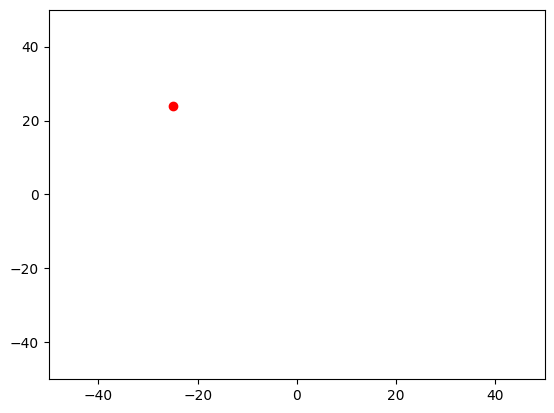

Guess the location of point (x, y) on graph:  -28, 22


Sorry, the correct answer was (-25, 24) but you provided (-28, 22)


In [146]:
plt.clf()
xlo = -50
xhi = 50
ylo = -50
yhi = 50

x = randint(xlo, xhi)
y = randint(ylo, yhi)

fig = plt.subplot()
plt.axis([xlo, xhi, ylo, yhi])
plt.plot([x], [y], 'ro')
plt.show()

gussed_x, gussed_y = [int(round(float(num.strip(' ')), 0)) for num in input("Guess the location of point (x, y) on graph: ").split(', ')]

if gussed_x == x and gussed_y == y:
    print("You got it!")
else:
    print(f"Sorry, the correct answer was ({x}, {y}) but you provided ({gussed_x}, {gussed_y})")